In [11]:
import pandas as pd
import numpy as np
from scipy import signal, optimize, special, stats
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import math
from uncertainties import ufloat

In [6]:
mereni = pd.read_excel("data_04.xlsx", sheet_name="List2", engine="openpyxl", usecols="A,B")

1. Pološířka 1. maxima v časovém průběhu impulsu TEA CO2 laseru.
2. Celková délka světelného impulsu TEA CO2 laseru.


In [7]:
out=pd.DataFrame.from_dict({"pološířka maxima [ns]": 68,
 "délka pulsu [\\mu s]": 1.31}, orient="index", columns=["Naměřené veličiny"])
out

,Naměřené veličiny
pološířka maxima [ns],68.00
délka pulsu [\mu s],1.31


3. Graf závislosti energie na čase a jejich výsledná střední kvadratická odchylka pro n měření, kde n je
přibližně 100, volitelně histogram energií.


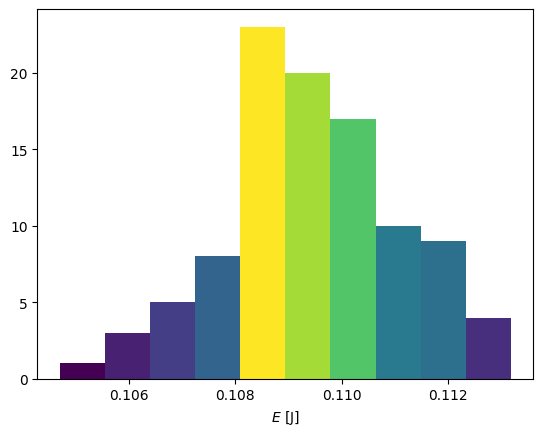

LinregressResult(slope=np.float64(-8.460846084608474e-06), intercept=np.float64(0.11024146991622238), rvalue=np.float64(-0.3163168162040498), pvalue=np.float64(0.0013452727014983984), stderr=np.float64(2.5632215152135998e-06), intercept_stderr=np.float64(0.0002937545794988258))


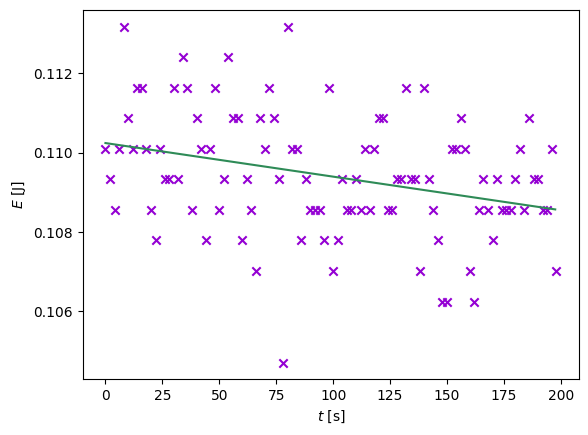

NormaltestResult(statistic=np.float64(0.7049312756272506), pvalue=np.float64(0.7029527243882419))
LinregressResult(slope=np.float64(-8.460846084608474e-06), intercept=np.float64(0.11024146991622238), rvalue=np.float64(-0.3163168162040498), pvalue=np.float64(0.0013452727014983984), stderr=np.float64(2.5632215152135998e-06), intercept_stderr=np.float64(0.0002937545794988258))
PearsonRResult(statistic=np.float64(-0.31631681620405), pvalue=np.float64(0.0013452727014983978))


In [25]:
energie = mereni["V_PP [V]"]/10.4

histogram = plt.figure()
N, bins, patches = plt.hist(energie)
# We'll color code by height, but you could use any scalar
fracs = N / N.max()
# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
#plt.hist(mereni["V_PP [V]"], color="darkviolet")
plt.xlabel("$E$ [J]")
plt.savefig("./img/histogram.pdf")
plt.show()



lin_regrese = stats.linregress(mereni["t [s]"], energie)
print(lin_regrese)

x_axis=np.arange(mereni["t [s]"].min(), mereni["t [s]"].max(), 0.5)
graf=plt.figure()
plt.scatter(mereni["t [s]"], energie, color="darkviolet", marker="x")
plt.plot(x_axis, lin_regrese[0]*x_axis+lin_regrese[1], color="seagreen")
plt.xlabel("$t$ [s]")
plt.ylabel("$E$ [J]")
plt.savefig("./img/graf.pdf")
plt.show()

print(stats.normaltest(energie))
print(stats.linregress(mereni["t [s]"], energie))

#print(mereni.corr())
print(stats.pearsonr(mereni["t [s]"], energie))



4. Předložit několik kvalitních výsledků značkování.